In [1]:
import numpy as np
import pandas as pd
import glob

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns

from astropy.cosmology import FlatLambdaCDM

#sns.set(font_scale=1.5, context='notebook', style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

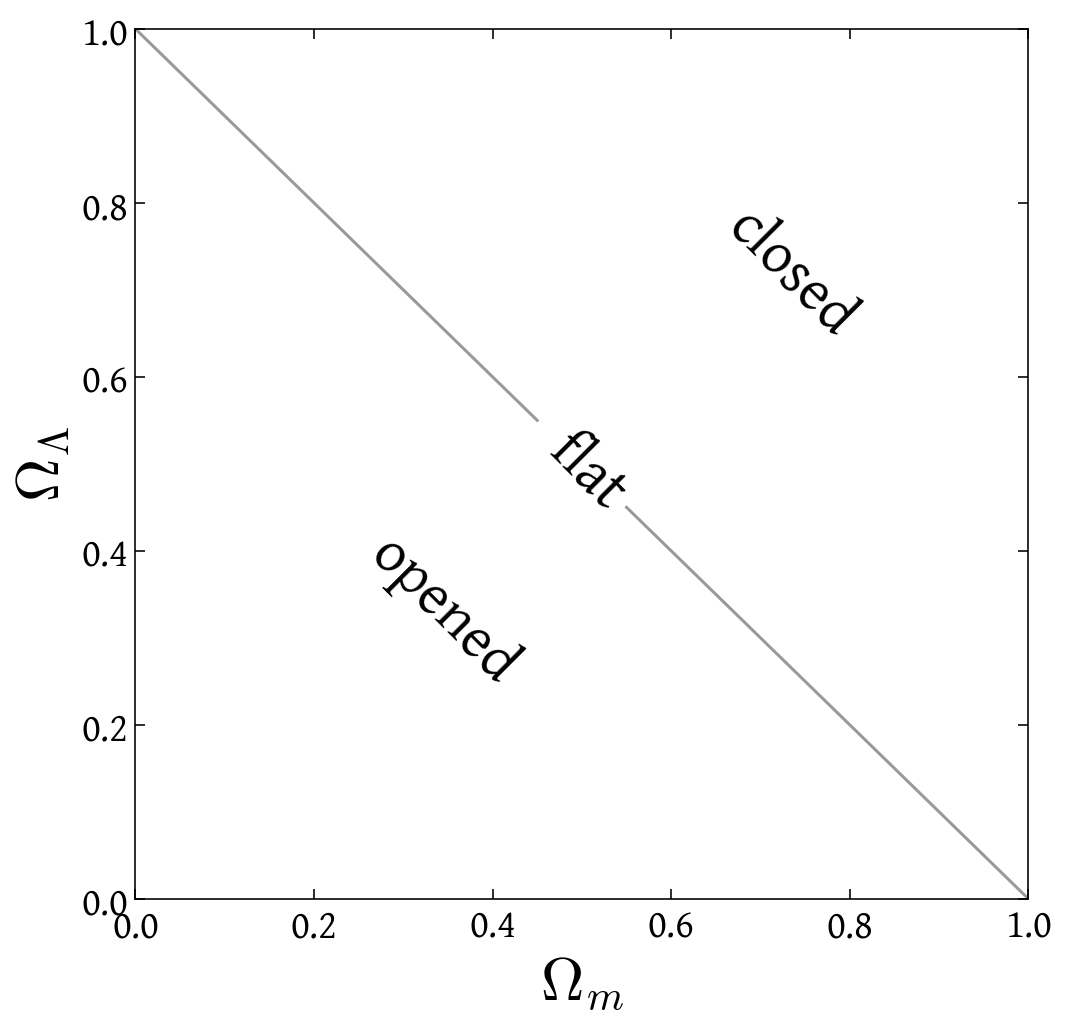

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot([0, 0.45], [1, 0.55], c='k', alpha=0.4)
ax.plot([0.55, 1], [0.45, 0], c='k', alpha=0.4)

ax.text(0.45, 0.45, 'flat', rotation=-45, fontsize=30)
ax.text(0.65, 0.65, 'closed', rotation=-45, fontsize=30)
ax.text(0.25, 0.25, 'opened', rotation=-45, fontsize=30)

ax.set_ylabel('$\Omega_{\Lambda}$', fontsize=30)
ax.set_xlabel('$\Omega_m$', fontsize=30)
ax.tick_params(labelsize=20, direction='in', length=5, top=True, right=True)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

#plt.savefig('plots/omega_plot.pdf', bbox_inches='tight')
plt.show()

In [6]:
import getdist.plots as gplot
import matplotlib.pyplot as plt
import numpy as np
#import plotsetup

bigmat=np.zeros((65,100))
sys_values=open('sys_full_long.txt','r').readlines()
for x in range(0,len(sys_values)):
    y=sys_values[x].split()
    print(y)
    #stop
    for z in range(0,len(y)):
        bigmat[x,z]=float(y[z])

#bigmat=np.zeros((65,100))
om=np.arange(0,2.6,0.04)
ol=np.arange(-1,3.0,0.04)
                                                                                                         
#mlcs_cont_ol.txt
# mlcs_cont_om.txt
#  mlcs_cont.txt

  
#plotsetup.halfpaperfig()
print(len(om))
print(len(ol))
#stop
print(om)
print(ol)
z= np.matrix.transpose(bigmat)

#CS = plt.contour(om,ol,bigmat.transpose)
#levels=[2.31, 6.17, 11.8]
g = gplot.getPlotter(chain_dir = '/scratch/midway/rkessler/dscolnic/cosmomc')
g.settings.fig_width_inch = 5.0
g.settings.lw_contour = 2.0
g.settings.solid_contour_palefactor = 0.2
g.settings.legend_frame = False
g.settings.axes_fontsize=12
g.settings.legend_fontsize=12
g.settings.lab_fontsize=14

#plt.savefig('plot_omol.png')

#stop
#roots = ['chains/noSN_omw', 'chains2/DS17_ALL_omw_alone','chains2/DS17_ALL_nosys_omw_alone','chains/noSN_bao_omw','chains2/DS17_ALL_omw','chains2/DS17_ALL_nosys_omw']
#names=['CMB','SN','SN(stat)','CMB+BAO','SN+CMB','SN(stat)+CMB']  
#colors=['teal','k','gray','blue','purple','gray']

roots = ['chains2/noSN_omol', 'chains2/DS17_ALL_omol_alone','chains2/DS17_ALL_omol_nosys_alone','chains2/DS17_ALL_omol']
#roots = ['chains2/noSN_omol','chains2/noSN_omol','chains2/noSN_omol','chains2/noSN_omol']
names=['CMB','SN','SN(stat)','SN+CMB']
#names=['SN','SN(stat)','SN+CMB']

roots=['chains2/DS17_ALL_omol_alone','chains2/DS17_ALL_omol_nosys_alone']
colors=['#C1292E','#778899']
#colors=['teal','k','blue','purple']
#'#778899'
#colors=['#235789','#C1292E','#778899','#020100','#F1D302','#FDFFFC']
x=np.arange(0,2,.1)
g.plot_2d(roots,'omegam','omegal*',
                                filled=[True,True,False,True],colors=colors)
line, = plt.plot(x, 1-x, lw=2,color='red',linestyle='--',alpha=0.3)
line, = plt.plot(x, 0.5*x, lw=2,color='blue',linestyle='--',alpha=0.3)
#g.plot_2d(roots, 'omegam', 'w', filled=True)
#g.legend(['CMB', 'CMB+BAO','SN+CMB','SN'], legend_loc='upper left',frameon=False,fontsize=8,ncol=2);
#line, = plt.plot(np.arange(-5,5,0.1), np.arange(-5,5,0.1)*0-1, lw=1,alpha=0.1)

plt.xlabel(r'$\Omega_m$',labelpad=10)
plt.ylabel(r'$\Omega_{\Lambda}$',labelpad=5)
plt.xlim(0.0,1.6)
plt.ylim(0.0,2.4)
plt.title(r'$o \rm{CDM}$'+' Constraints For SN-only Sample')

#plt.xticks([])
#plt.yticks([])
str2=colors
#colors=['black','green','blue','red','purple']
#proxy = [plt.Rectangle((0,0),.05,.05,fc = str2[pc]) for pc in range(0,4)]
proxy = [plt.Rectangle((0,0),.05,.05,fc = str2[pc]) for pc in range(0,2)] 
#names=['CMB','SN','SN(stat)','CMB+BAO','SN+CMB','SN(stat)+CMB']


#plt.text(0.13,0.29,"Accelerating Universe", color='blue',rotation=28,alpha=0.5)
#plt.text(0.17,0.23,"Decelerating Universe", color='blue',rotation=28,alpha=0.5)

#plt.text(0.7,0.21,"Flat Universe", color='red',rotation=315,alpha=0.5)

plt.text(0.9,0.8,"Accelerating Universe", color='blue',rotation=20,alpha=0.5)
plt.text(0.88,0.68,"Decelerating Universe", color='blue',rotation=20,alpha=0.5)

plt.text(0.52,0.34,"Flat Universe", color='red',rotation=325,alpha=0.5)



#plt.legend(proxy,names,loc='upper right',prop={'size':12},frameon=False,ncol=2)
#CS = plt.contour(om,ol,-2.0*np.log(z),levels=[2.31, 6.17, 11.8] )
CS = plt.contour(om,ol,-2.0*np.log(z),levels=[2.31, 6.17],colors=['black','black'] )

plt.text(0.4,2.0,"R98 Discovery Sample", color='black',rotation=37)
plt.text(0.5,1.1,"Pantheon", color='red',rotation=40,alpha=0.5)
plt.text(0.21,1.25,"Pantheon (Stat)", color='gray',rotation=40,alpha=0.5)


#CS2 = plt.contour(om,ol,z)

plt.figure(figsize=(20,10))
str2=colors
#colors=['black','green','blue','red','purple']
#'CMB', 'CMB+BAO','SN+CMB','SN'
#plt.savefig('plot_omol.png') 
g.export('plot_omol.png')

['1048']
['0.000179045']
['0.000146745']
['9.407e-05']
['9.915e-05']
['7.4955e-05']
['6.632e-05']
['9.84e-06']
['-5.051e-05']
['5.896e-05']
['0.00017474']
['0.00010661']
['0.000127765']
['8.23e-05']
['7.144e-05']
['-8.692e-05']
['9.1645e-05']
['0.0001213']
['0.00016934']
['7.4555e-05']
['7.6505e-05']
['0.000143335']
['0.00017623']
['0.000125025']
['0.00010037']
['0.000172075']
['0.00011268']
['7.248e-05']
['6.5035e-05']
['2.015e-05']
['0.000220695']
['0.00011376']
['0.000115385']
['7.077e-05']
['5.8565e-05']
['0.00016799']
['6.2805e-05']
['1.921e-05']
['4.6255e-05']
['0.00013829']
['0.00011187']
['5.795e-05']
['0.000178395']
['-3.243e-05']
['6.5585e-05']
['6.255e-05']
['0.000150145']
['0.00016251']
['2.2945e-05']
['0.00011309']
['0.000100145']
['0.000160645']
['0.000113095']
['6.0675e-05']
['0.000177255']
['7.473e-05']
['0.00011022']
['6.3455e-05']
['7.633e-05']
['9.727e-05']
['9.1635e-05']
['7.336e-05']
['0.000123405']
['0.000102975']
['-4.1175e-05']
['-3.7465e-05']


IndexError: index 65 is out of bounds for axis 0 with size 65